# Double 7's Portfolio
    
    (optimize period)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [13]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [14]:
#symbols = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
#symbols = ['IWB', 'SPY', 'VGK', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']
#symbols = ['FB', 'AMZN', 'NFLX', 'GOOG']
symbols = ['SPY', 'QQQ', 'TLT', 'GLD']
#symbols = ['SPY']

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()
#end = datetime.datetime(2019, 1, 1)
period = 6

use_cache = True
use_regime_filter = True
use_vola_weight = True

Define Optimizations

In [15]:
# pick one
optimize_period = True

# define period
if optimize_period:
    Xs = range(3, 18+1, 1)
    Xs = [str(X) for X in Xs]

Run Strategy

In [16]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print("{0}".format(X), end=" ")
    if optimize_period:
        strategies[X] = strategy.Strategy(symbols, capital, start, end, margin=3, period=int(X),
                                          use_cache=use_cache, use_regime_filter=use_regime_filter,
                                          use_vola_weight=use_vola_weight)
    strategies[X].run()
    strategies[X].rlog, strategies[X].tlog, strategies[X].dbal = strategies[X].get_logs()
    strategies[X].stats = strategies[X].get_stats()

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

Summarize results

In [17]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
annual_return_rate,13.18,14.80,15.52,18.27,16.80,15.00,16.62,17.82,18.38,16.42,13.93,13.94,13.82,12.80,12.59,13.27
max_closed_out_drawdown,-22.55,-21.83,-21.67,-24.18,-24.36,-35.56,-35.62,-30.24,-30.26,-32.83,-32.77,-30.60,-30.55,-28.42,-28.45,-28.42
drawdown_annualized_return,-1.71,-1.47,-1.40,-1.32,-1.45,-2.37,-2.14,-1.70,-1.65,-2.00,-2.35,-2.20,-2.21,-2.22,-2.26,-2.14
drawdown_recovery,-0.08,-0.08,-0.10,-0.62,-0.59,-0.08,-0.09,-0.04,-0.04,-0.08,-0.11,-0.11,-0.11,-0.03,-0.03,-0.03
best_month,19.15,21.82,29.31,29.77,20.93,40.36,40.33,44.50,45.74,43.35,39.45,39.45,39.78,39.99,40.06,42.38
worst_month,-22.55,-21.83,-21.67,-19.07,-15.46,-35.56,-35.62,-29.97,-30.00,-32.83,-32.77,-30.60,-30.55,-27.92,-27.95,-27.92
sharpe_ratio,0.78,0.86,0.89,1.03,0.95,0.81,0.90,0.97,1.01,0.90,0.77,0.78,0.78,0.73,0.73,0.78
sortino_ratio,0.82,0.92,0.99,1.15,1.07,0.86,0.93,1.04,1.07,0.94,0.81,0.83,0.82,0.77,0.77,0.81
monthly_std,4.03,4.08,4.06,3.84,3.89,4.41,4.38,4.33,4.33,4.31,4.31,4.34,4.32,4.20,4.16,4.07
pct_time_in_market,71.13,72.21,71.47,69.48,70.41,70.73,68.90,69.61,69.43,69.13,69.51,68.71,68.55,68.44,67.33,67.12


Bar graphs

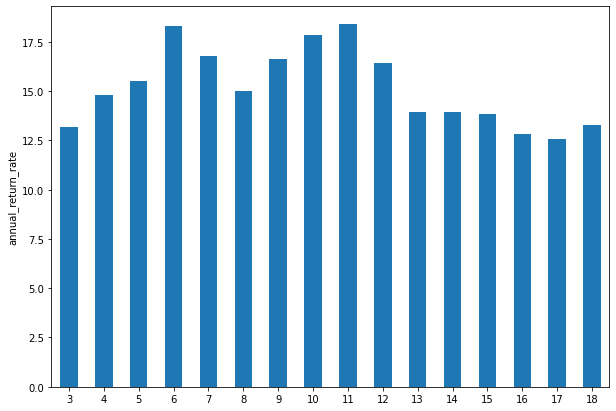

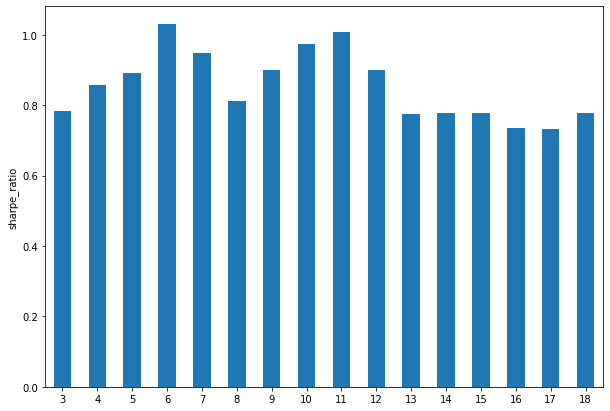

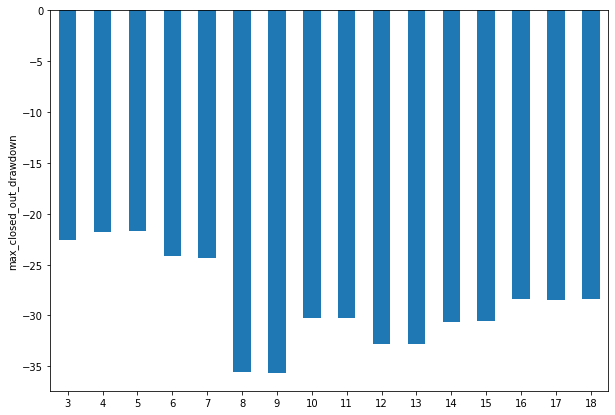

In [18]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [19]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark('SPY', capital, s.start, s.end, use_adj=True)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2005-09-02 00:00:00 BUY  110 SPY @ 90.30
2020-08-21 00:00:00 SELL 110 SPY @ 339.48


Equity curve

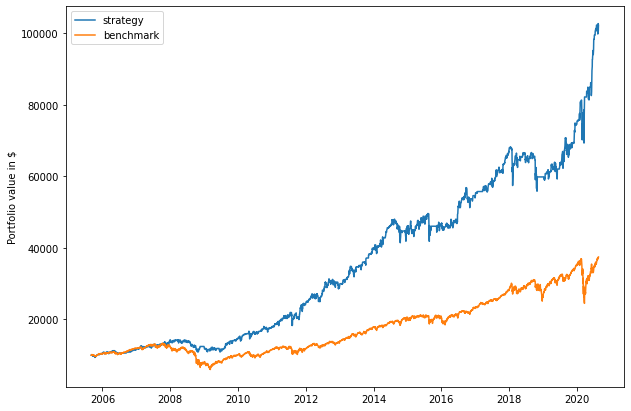

In [20]:
if optimize_period: Y = '7'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)

In [21]:
def plot_equity_curves(strategies):
    """
    Plot Equity Curve: multiple equity curves on same plot
    Arguement is daily balance.
    """
    fig = plt.figure(figsize=(16,12))
    axes = fig.add_subplot(111, ylabel='Portfolio value in $')
    for strategy in strategies:
        axes.plot(strategy.dbal['close'], label=strategy.period)

    plt.legend(loc='best')

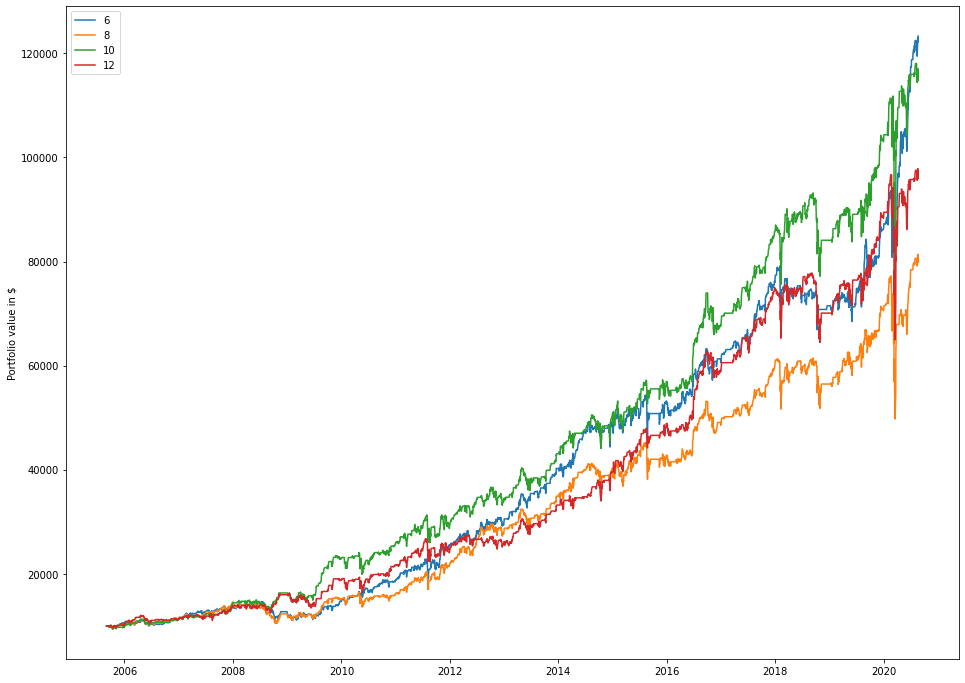

In [22]:
plot_equity_curves(strategies[3:10:2])